<a href="https://colab.research.google.com/github/Abdulrahmann-Omar/Stock-Prediction/blob/main/Abdulrahman_Omar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [ ]:

!pip install scikit-learn==1.6.1



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

data = yf.download("AAPL", start="2010-01-01", end="2024-12-31")

data = data.rename(columns={'Adj Close': 'Adj_Close'})


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391279,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348845,6.477044,6.342225,6.451465,552160000
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
2010-01-08,6.379242,6.379844,6.291369,6.328685,447610800
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


## EDA

In [ ]:
print(data.head())
print(data.tail())

print(data.info())

print(data.describe())

print("Missing values:\n", data.isna().sum())

print("Number of duplicates:", data.duplicated().sum())


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391279  6.422878  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348845  6.477044  6.342225  6.451465  552160000
2010-01-07  6.337110  6.379843  6.291067  6.372319  477131200
2010-01-08  6.379242  6.379844  6.291369  6.328685  447610800
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-12-23  254.989655  255.369227  253.171646  254.490204  40858800
2024-12-24  257.916443  257.926411  255.009620  255.209412  23234700
2024-12-26  258.735504  259.814335  257.347047  257.906429  27237100
2024-12-27  255.309296  258.415896  252.782075  257.546826  42355300
2024-12-30  251.92301

<Figure size 1000x600 with 0 Axes>

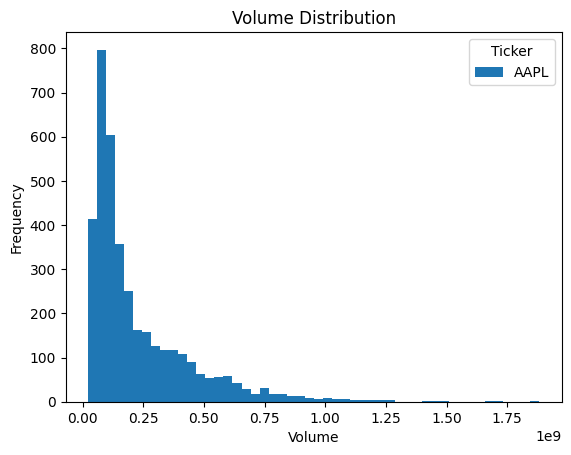

In [ ]:
# Volume distribution
plt.figure(figsize=(10, 6))
data['Volume'].plot(kind='hist', bins=50)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


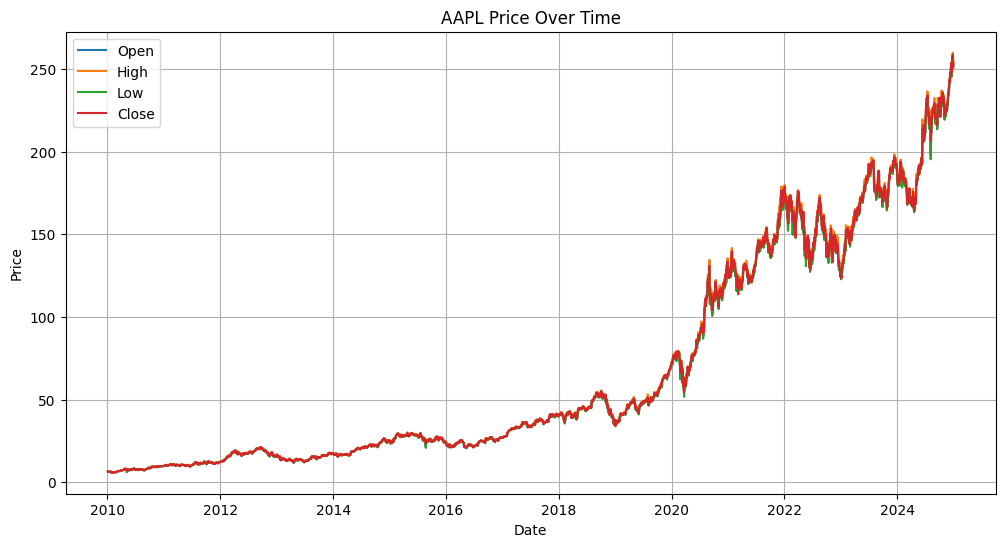

In [ ]:
plt.figure(figsize=(12, 6))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(data.index, data[(col, 'AAPL')], label=col)

plt.title('AAPL Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


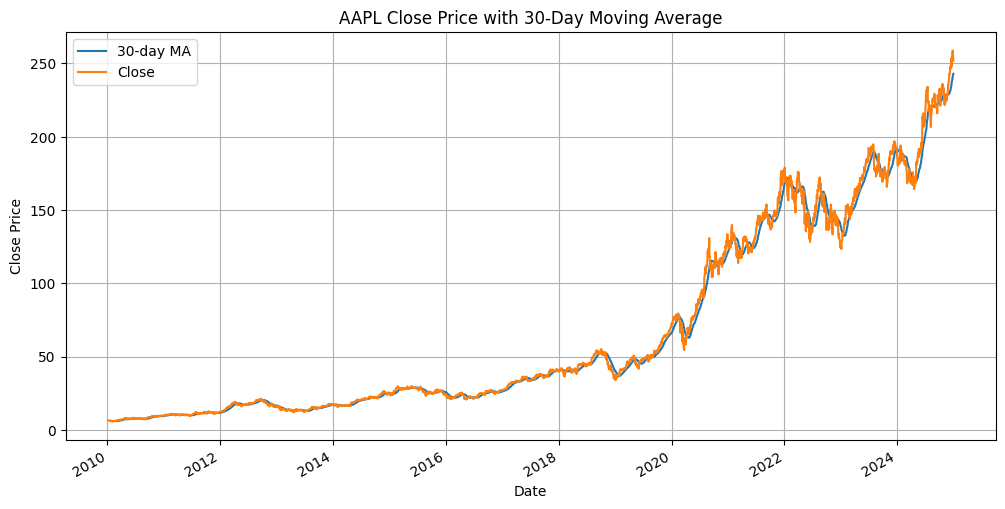

In [ ]:
# Rolling mean and actual close
plt.figure(figsize=(12, 6))
data[('Close', 'AAPL')].rolling(window=30).mean().plot(label='30-day MA')
data[('Close', 'AAPL')].plot(label='Close')

plt.title('AAPL Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


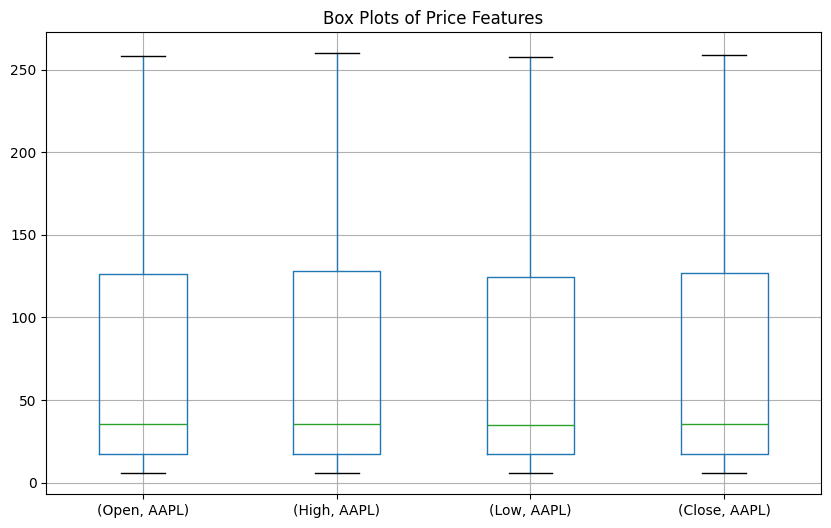

In [ ]:
plt.figure(figsize=(10, 6))
data[[('Open', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Close', 'AAPL')]].boxplot()
plt.title('Box Plots of Price Features')
plt.show()


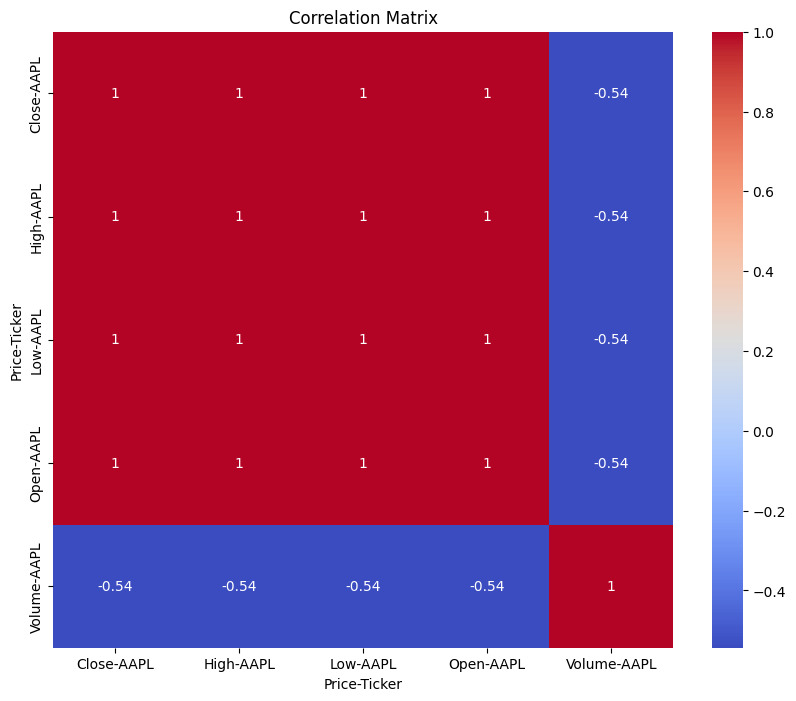

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Daily return and log return using the 'Close' price
data['Daily_Return'] = data[('Close', 'AAPL')].pct_change()
data['Log_Return'] = np.log(data[('Close', 'AAPL')] / data[('Close', 'AAPL')].shift(1))

print(data[['Daily_Return', 'Log_Return']].head())


Price      Daily_Return Log_Return
Ticker                            
Date                              
2010-01-04          NaN        NaN
2010-01-05     0.001729   0.001727
2010-01-06    -0.015907  -0.016034
2010-01-07    -0.001849  -0.001850
2010-01-08     0.006649   0.006627


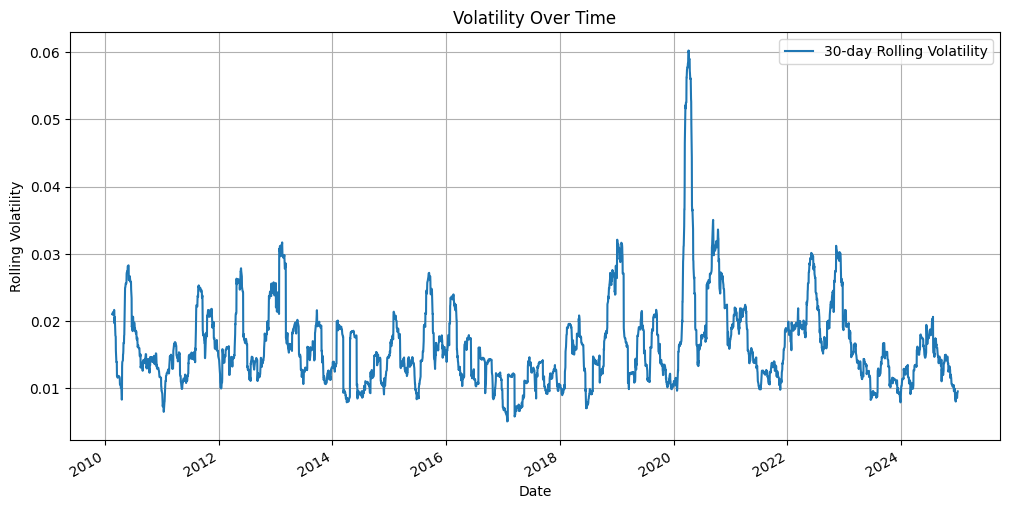

In [ ]:
plt.figure(figsize=(12, 6))
data['Daily_Return'].rolling(window=30).std().plot(label='30-day Rolling Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Missing values:\n", data.isna().sum())

data.fillna(method='ffill', inplace=True)


Missing values:
 Price         Ticker
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily_Return            1
Log_Return              1
dtype: int64


<ipython-input-14-2c1d4d7b2ad0>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn --upgrade --force-reinstall


## Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Standardize the features
scaler = StandardScaler()
data_scaled = data[features]
data_scaled[features] = scaler.fit_transform(data_scaled[features])

print(data_scaled.head())


Price           Open      High       Low     Close    Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL
Date                                                        
2010-01-04 -0.931844 -0.932393 -0.930926 -0.931300  1.209624
2010-01-05 -0.931307 -0.931897 -0.930522 -0.931130  1.705725
2010-01-06 -0.931408 -0.932061 -0.931682 -0.932696  1.477591
2010-01-07 -0.932617 -0.933530 -0.932471 -0.932875  1.133502
2010-01-08 -0.933283 -0.933530 -0.932467 -0.932232  0.998119


<ipython-input-16-913f3048ce3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scaled[features] = scaler.fit_transform(data_scaled[features])


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data_scaled[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data_scaled['Close']  # Or select other column as target

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3018, 5), Test shape: (755, 5)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(random_state=42)


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:

y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2259242569701642e-05
Root Mean Squared Error: 0.003501320118141391
R-squared: 0.999988223104991


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


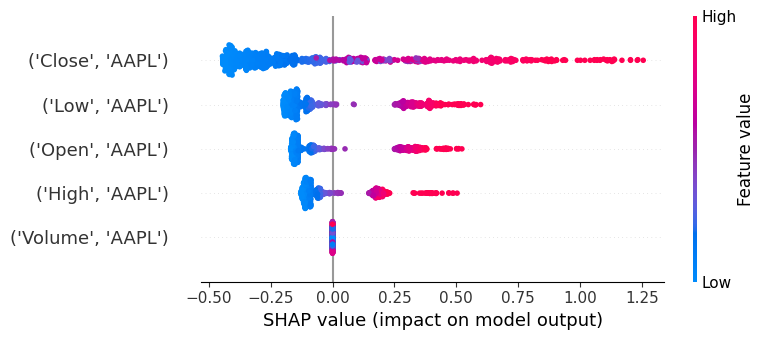

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1178b1994b9d4e7763fb73aafa267b0da11c48d5596d649a1e300df7d439016c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode='regression')

# Explain a single prediction (e.g., the first row of test data)
explanation = explainer.explain_instance(X_test.values[0], model.predict)

# Show the explanation
explanation.show_in_notebook()


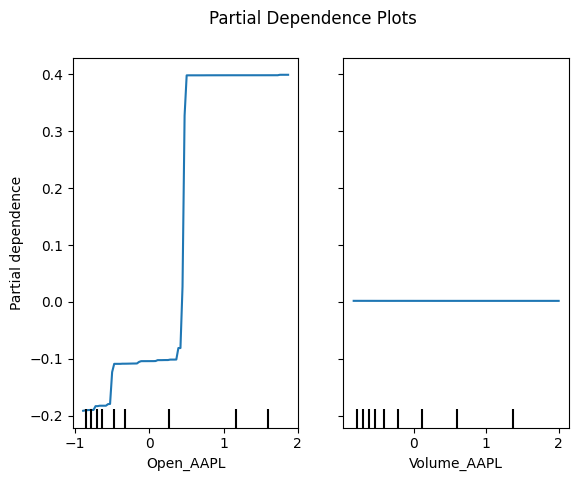

In [ ]:
# Flatten MultiIndex column names
X_train.columns = ['_'.join(filter(None, col)) for col in X_train.columns]
X_test.columns = ['_'.join(filter(None, col)) for col in X_test.columns]

# Then use flat names in your features list
features = ['Open_AAPL', 'Volume_AAPL']

from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model, X_train, features)
plt.suptitle("Partial Dependence Plots")
plt.show()
